In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
df=pd.read_csv("BREAST CANCER DATA.zip")

In [9]:

# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Convert 'diagnosis' to numeric (M = 0, B = 1)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})


In [11]:
# Use only 2 features for simplicity
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [19]:
y_pred_linear = linear_model.predict(X_test)
print("Linear SVM:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


Linear SVM:
[[36  7]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [21]:
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X_train, y_train)


SVC(C=1)

In [23]:
y_pred_rbf = rbf_model.predict(X_test)
print("RBF SVM:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


RBF SVM:
[[38  5]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [37]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title(title)
    plt.show()

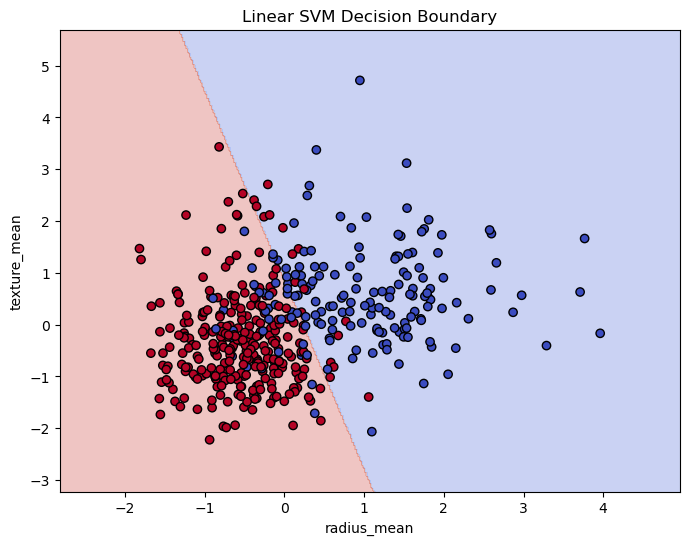

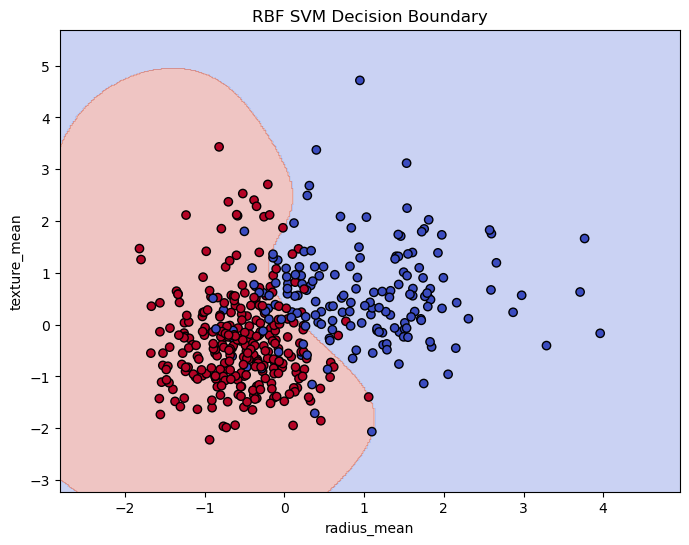

In [45]:
plot_decision_boundary(linear_model, X_train, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_model, X_train, y_train, "RBF SVM Decision Boundary")
